In [1]:
from PIL import Image
import requests
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import pyocr

In [2]:
def openImg(url):
    pil_img = Image.open(io.BytesIO(requests.get(url).content))
    pil_img = pil_img.convert('RGB')
    np_img = np.array(pil_img)
    return np_img

In [29]:
img = openImg("https://raw.githubusercontent.com/result-database/ocr-api-v3-notebook/main/IMG_8958.png")

# left:0 top:1/6 right:1/2 bottom:1/2
img = img[img.shape[0] // 6 : img.shape[0] // 2, 0 : img.shape[1] // 3 * 2]

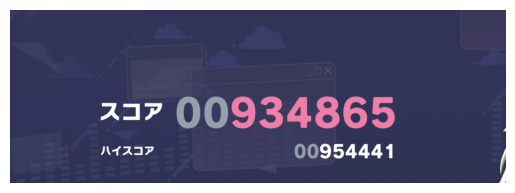

In [53]:
plt.imshow(img)
plt.axis('off')
plt.show()

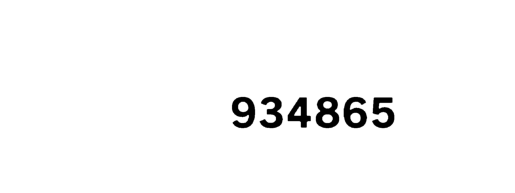

In [68]:
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

#ff77aa 255,119,170

border = 20

mask = np.logical_and.reduce((r >= 255 - border, r <= 255 + border, 
                              g >= 119 - border, g <= 119 + border, 
                              b >= 170 - border, b <= 170 + border))
img2 = img.copy()

img2[mask] = [0, 0, 0]
img2[np.logical_not(mask)] = [255, 255, 255]

plt.imshow(img2)
plt.axis('off')
plt.show()

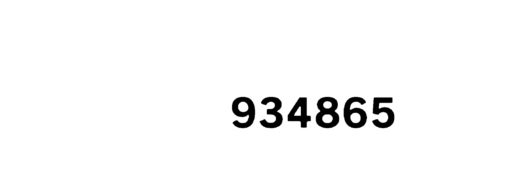

In [69]:
img2 = cv2.blur(img2, (3, 3))

plt.imshow(img2)
plt.axis('off')
plt.show()

In [70]:
tools = pyocr.get_available_tools()
tool = tools[0]

builder = pyocr.builders.DigitBuilder(tesseract_layout=7)

result = tool.image_to_string(Image.fromarray(img2), lang="eng", builder=builder)

result = result.replace(' ', '')
result = result.replace('\n', '')

print(result)

934865
